## Install the Pre-requisites

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/SpeakerProfiling-main/speaker_nlp

/content/drive/MyDrive/SpeakerProfiling-main/speaker_nlp


In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Aug 22 14:06:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [5]:
!pip install --user -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 705 kB 7.5 MB/s 
     |████████████████████████████████| 61 kB 488 kB/s 
     |████████████████████████████████| 419 kB 63.3 MB/s 
     |████████████████████████████████| 1.8 MB 59.2 MB/s 
     |████████████████████████████████| 125 kB 54.4 MB/s 
     |████████████████████████████████| 496 kB 49.2 MB/s 
     |████████████████████████████████| 5.9 MB 39.0 MB/s 
     |████████████████████████████████| 11.0 MB 41.0 MB/s 
     |████████████████████████████████| 157 kB 63.4 MB/s 
     |████████████████████████████████| 181 kB 58.7 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 157 kB 58.2 MB/s 
     |████████████████████████████████| 157 kB 73.0 MB/s 
     |████████████████████████████████| 157 kB 65.4 MB/s 
     |████████████████████████████████| 157 kB 70.8 MB/s 
     |█████████████████████████████

# Dataset


## Download the NISP Dataset

Edit config.py with data path or add as arguments

# Download Noise Dataset

In [ ]:
mkdir noise_dataset

In [ ]:
import wavencoder
wavencoder.utils.download_noise_dataset('noise_dataset', sample_rate='16k', download_all=True)

# Prepare NISP Dataset

In [ ]:
!python prepare_nisp_data.py 

# EDA on the NISP Datasets

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("../NISP-Dataset/total_spkrinfo.list", sep=' ')
df.head(10)

,Speaker_ID,Gender,Mother_Tongue,Height,Shoulder_size,Waist_size,Weight,Age,Native_State,Native_District
0,Hin_0001,Female,Hindi,163.0,40.0,89.5,58.5,24.24,Rajasthan,Jaipur
1,Hin_0002,Female,Hindi,154.5,36.5,72,50.9,26.06,Madhya_Pradesh,Indore
2,Hin_0003,Male,Hindi,167.5,40.5,78,56.6,21.51,Haryana,Faridabad
3,Hin_0004,Male,Hindi,176.0,43.0,91.5,77.6,21.09,Chhattisgarh,Bilaspur
4,Hin_0005,Female,Hindi,153.0,40.5,96,80.2,27.39,Uttar_Pradesh,Kanpur_Nagar
5,Hin_0006,Male,Hindi,166.0,43.0,86,61.6,25.98,Delhi,West
6,Hin_0007,Female,Hindi,178.0,44.0,88,67.8,25.31,Maharashtra,Gondiya
7,Hin_0008,Male,Hindi,179.0,44.0,94,81.8,29.72,West_Bengal,Haora
8,Hin_0009,Male,Hindi,165.0,43.0,89,70.2,24.08,Delhi,West
9,Hin_0010,Male,Hindi,165.0,42.0,79,65.0,22.79,Uttar_Pradesh,Kanpur_Nagar


In [ ]:
#Total Speakers
df.Speaker_ID.count()

345

In [ ]:
df.Gender.value_counts()

Male      219
Female    126
Name: Gender, dtype: int64

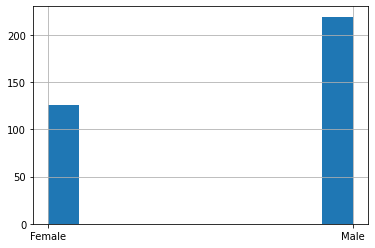

In [ ]:
# Distribution of Male and Gender Speakers
df.Gender.hist()

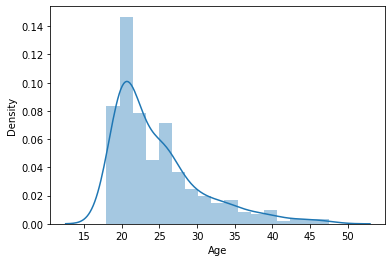

In [ ]:
# Distribution of Age across the speakers
sns.distplot(df['Age'], kde=True)
plt.show()

Gender
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

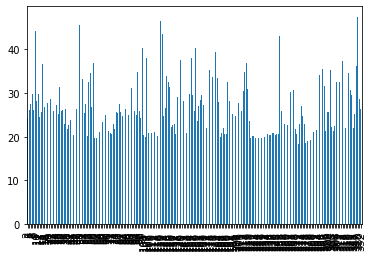

In [ ]:
# Distribution of Age group across male and female
df.groupby("Gender")['Age'].plot(kind='bar')
#df_groupby.plot(Kind='bar')


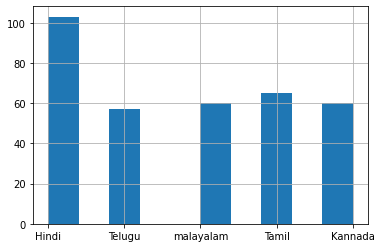

In [ ]:
# Distribution of Speakers based on Mother Tongue
df.Mother_Tongue.hist()

In [ ]:
# Distribution of Male and female based on their Mother Tongue

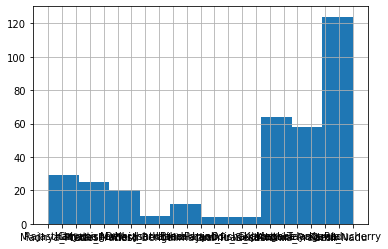

In [ ]:
# Distribution of Speakers across State
df.Native_State.hist()

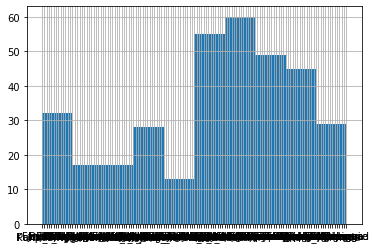

In [ ]:
# Distribution of speakers across Districts

df.Native_District.hist()

# Train, Validate and Test the Dataset

# Run the Model with Wav2Vec encoder + LSTM Attention layer + Multitask layer

In [8]:
!python train_nisp.py --data_path="../NISP-Dataset/trim_final_data_16k" --speaker_csv_path="../NISP-Dataset/total_spkrinfo.list" --noise_dataset_path="../noise_dataset" --n_workers=4

2022-08-22 06:36:50 | INFO | numexpr.utils | NumExpr defaulting to 8 threads.
2022-08-22 06:36:51 | INFO | torch.distributed.nn.jit.instantiator | Created a temporary directory at /tmp/tmpllg37kxl
2022-08-22 06:36:51 | INFO | torch.distributed.nn.jit.instantiator | Writing /tmp/tmpllg37kxl/_remote_module_non_scriptable.py
Training Model on NISP Dataset
#Cores = 4	#GPU = 1
Dataset Split (Train, Validation, Test)= 1766 862 1603
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: 2
wandb: You chose 'Use an existing W&B account'
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Tracking run with wandb version 0.13.1


#Run the Model with SpeechBrain Fbank + Xvector + LSTM Attention layer + Multitask layer

In [50]:
!python train_nisp.py --data_path="../NISP-Dataset/Total_final_data_16k" --speaker_csv_path="../NISP-Dataset/total_spkrinfo.list" --noise_dataset_path="../noise_dataset" --n_workers=4

2022-08-22 19:21:24 | INFO | numexpr.utils | NumExpr defaulting to 8 threads.
2022-08-22 19:21:24 | INFO | torch.distributed.nn.jit.instantiator | Created a temporary directory at /tmp/tmp5ryapm6n
2022-08-22 19:21:24 | INFO | torch.distributed.nn.jit.instantiator | Writing /tmp/tmp5ryapm6n/_remote_module_non_scriptable.py
Training Model on NISP Dataset
#Cores = 4	#GPU = 1
Dataset Split (Train, Validation, Test)= 12933 4231 11107
wandb: Currently logged in as: satishkumar. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.13.1
wandb: Run data is saved locally in /content/drive/MyDrive/SpeakerProfiling-main/speaker_nlp/wandb/run-20220822_192223-3ecvnnss
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run magic-sponge-787
wandb: ⭐️ View project at https://wandb.ai/satishkumar/SpeakerProfiling
wandb: 🚀 View run at https://wandb.ai/satishkumar/SpeakerProfiling/runs/3ecvnnss
/root/.local/lib/python3.7/site-packages/torchmetrics/utilities/pri

In [47]:
import torch
x = torch.tensor(13.5973, device = 'cuda:0')
x = torch.nan_to_num(x)
print(x)

tensor(13.5973, device='cuda:0')


In [18]:
!pip install speechbrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
!pip3 install torch torchvision torchaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
import torch
import torchaudio
import speechbrain
from speechbrain.lobes.features import MFCC, Fbank
from speechbrain.lobes.models.Xvector import Xvector
from speechbrain.lobes.models.Xvector import Classifier
from speechbrain.lobes.models.Xvector import Discriminator

wav_folder = "/content/drive/MyDrive/SpeakerProfiling-main/NISP-Dataset/trim_final_data_16k/TRAIN/Mal_0016_Eng_m_0624.wav"

wav, sample_rate = torchaudio.load(wav_folder)

print (wav.shape)



torch.Size([1, 108501])


In [108]:
wav1 = wav.squeeze(1)
feature_maker = Fbank()
feats = feature_maker(wav1)
#feats=feats.squeeze(0)
print(feats.shape)

torch.Size([1, 679, 40])


In [111]:

compute_xvect = Xvector('gpu')
print(feats.shape)
xvector = compute_xvect(feats.float())
print(xvector.shape)

torch.Size([1, 679, 40])
torch.Size([1, 1, 512])


In [65]:
print(feats)

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  1.8942e-02,
          1.7756e-01,  2.9791e-01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  1.7756e-01,
          2.9791e-01,  2.0824e-01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  2.9791e-01,
          2.0824e-01,  2.0998e-01],
        ...,
        [-2.2869e+02, -2.2733e+02, -2.2541e+02,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-2.2733e+02, -2.2541e+02, -2.2302e+02,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-2.2541e+02, -2.2302e+02, -2.3115e+02,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]])


In [66]:
print(feats.shape)

torch.Size([679, 1320])


In [64]:
feats=feats.squeeze(0)
compute_xvect = Xvector('gpu')
input_feats = torch.tensor(feats)
outputs = compute_xvect(feats)
outputs.shape


RuntimeError: ignored

In [103]:
mfccs = torchaudio.transforms.MFCC()(wav)
print(mfccs.shape)
print(mfccs)


torch.Size([1, 40, 543])
tensor([[[-4.9238e+02, -4.7136e+02, -4.9346e+02,  ..., -4.6822e+02,
          -4.6996e+02, -4.6545e+02],
         [ 3.5463e+01,  6.0767e+01,  4.1541e+01,  ...,  6.4055e+01,
           6.4261e+01,  6.2463e+01],
         [ 4.9279e+00,  1.8645e+01,  1.3923e+01,  ...,  1.2233e+01,
           1.4190e+01,  6.4470e+00],
         ...,
         [-8.8762e+00, -2.8495e+00,  2.4021e-01,  ..., -2.9395e+00,
          -6.4326e-01, -5.3355e+00],
         [-5.7688e+00, -3.2391e+00, -3.3918e+00,  ...,  1.4334e+00,
          -2.9984e+00, -8.6561e+00],
         [ 1.2056e-01, -4.9298e+00, -1.7523e+00,  ...,  2.9704e-02,
          -7.4032e+00, -6.6734e+00]]])


In [73]:
compute_xvect = Xvector('gpu')

outputs = compute_xvect(mfccs.transpose(1,2))

print(outputs.shape)


torch.Size([1, 1, 512])


In [ ]:
from speechbrain.lobes.models.Xvector import Classifier

compute_xvect = Xvector('gpu')
outputs = compute_xvect(mfccs.transpose(1,2))

print(outputs.shape)
outputs = outputs.transpose(1,2)
classify = Classifier(input_shape=outputs.shape, out_neurons=5)
output = classify(outputs)
output.shape


torch.Size([1, 1, 512])


torch.Size([1, 512, 5])

In [ ]:
print(output)

tensor([[[-2.0856, -1.7966, -1.3893, -1.3998, -1.5418],
         [-2.0792, -1.8013, -1.4228, -1.3787, -1.5280],
         [-1.4934, -0.3174, -7.7598, -3.2428, -4.8464],
         ...,
         [-1.9810, -1.8898, -0.8639, -1.9972, -1.8725],
         [-0.8161, -1.2388, -4.2798, -2.0969, -2.0291],
         [-1.1795, -1.5360, -3.0197, -1.5457, -1.5354]]],
       grad_fn=<ReshapeAliasBackward0>)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
pred_probab = nn.Sigmoid()(output)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([[362]])


In [ ]:
from speechbrain.lobes.models.Xvector import Discriminator

compute_xvect = Xvector('gpu')
outputs = compute_xvect(mfccs.transpose(1,2))

outputs = outputs.transpose(1,2)

discriminate = Discriminator(outputs.shape)
output = discriminate(outputs)
output.shape

torch.Size([1, 512, 1])

In [11]:
x = tensor[128, 1, 1, 512]
x = x.squeeze(1)
print(x.shape)

NameError: ignored

##### Test the trained model

add the path to last saved model checkpoint

In [ ]:
!python SpeakerProfiling\test_nisp.py --model_checkpoint="SpeakerProfiling\\kfdq7ggx\\checkpoints\\epoch=0-step=7.ckpt" --data_path="NISP-Dataset\\final_data_16k" --speaker_csv_path="NISP-Dataset\\total_spkrinfo.list"




Testing Model on NISP Dataset

2022-08-03 22:26:02 | INFO | numexpr.utils | NumExpr defaulting to 8 threads.
2022-08-03 22:26:03 | INFO | pytorch_lightning.utilities.rank_zero | GPU available: False, used: False
2022-08-03 22:26:03 | INFO | pytorch_lightning.utilities.rank_zero | TPU available: False, using: 0 TPU cores
2022-08-03 22:26:03 | INFO | pytorch_lightning.utilities.rank_zero | IPU available: False, using: 0 IPUs
2022-08-03 22:26:03 | INFO | pytorch_lightning.utilities.rank_zero | HPU available: False, using: 0 HPUs
2022-08-03 22:26:06 | INFO | numexpr.utils | NumExpr defaulting to 8 threads.
2022-08-03 22:26:09 | INFO | numexpr.utils | NumExpr defaulting to 8 threads.
2022-08-03 22:26:13 | INFO | numexpr.utils | NumExpr defaulting to 8 threads.
2022-08-03 22:26:16 | INFO | numexpr.utils | NumExpr defaulting to 8 threads.
2022-08-03 22:26:20 | INFO | numexpr.utils | NumExpr defaulting to 8 threads.
2022-08-03 22:26:23 | INFO | numexpr.utils | NumExpr defaulting to 8 threads.
2022-08-03 22:26:27 | INFO | nu


#Cores = 8	#GPU = -1
Model Details: #Params = 6125187	#Trainable Params = 872067

Testing on NISP Dataset:


Testing: 0it [00:00, ?it/s]
Testing DataLoader 0: 100%|##########| 13/13 [04:51<00:00, 22.44s/it]
+-------------------------------------------------------+
|        Test metric        |       DataLoader 0        |
|---------------------------+---------------------------|
|     femal_height_rmse     |            nan            |
|      female_age_mae       |            nan            |
|      female_age_rmse      |            nan            |
|     female_height_mae     |            nan            |
|       male_age_mae        |            nan            |
|       male_age_rmse       |            nan            |
|      male_height_mae      |            nan            |
|     male_height_rmse      |            nan            |
|      test_gender_acc      |    0.7638221383094788     |
+-------------------------------------------------------+


In [ ]:
import torch
print(torch. __version__)

1.12.0


In [ ]:
import pytorch_lightning
print(pytorch_lightning. __version__)

1.7.0rc1


In [ ]:
#from speechbrain.pretrained import EncoderClassifier
import speechbrain
from speechbrain.lobes.models.Xvector import Xvector
from speechbrain.lobes.models.Xvector import Classifier
from speechbrain.lobes.models.Xvector import Discriminator
#speechbrain.lobes.models.Xvector.Xvecto

In [ ]:
compute_xvect = Xvector('cpu')
input_feats = torch.rand([5, 10, 40])
outputs = compute_xvect(input_feats)
outputs.shape

torch.Size([5, 1, 512])

In [ ]:
input_feats = torch.rand([5, 10, 40])
compute_xvect = Xvector()
xvects = compute_xvect(input_feats)
classify = Classifier(input_shape=xvects.shape)
output = classify(xvects)
output.shape

torch.Size([5, 1, 1211])

In [ ]:
discriminate = Discriminator(xvects.shape)
output = discriminate(xvects)
output.shape

torch.Size([5, 1, 1])

In [ ]:
import pandas
print(pandas.__version__)

1.4.2


In [ ]:
from speechbrain.pretrained import EncoderClassifier
classifier = EncoderClassifier.from_hparams(source="speechbrain/spkrec-xvect-voxceleb", savedir="pretrained_models/spkrec-xvect-voxceleb")
signal, fs =torchaudio.load('tests/samples/ASR/spk1_snt1.wav')
embeddings = classifier.encode_batch(signal)